In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

Happiness2015 = pd.read_csv('2015.csv')
Happiness2016 = pd.read_csv('2016.csv')
Happiness2017 = pd.read_csv('2017.csv')
Happiness2018 = pd.read_csv('2018.csv')
Happiness2019 = pd.read_csv('2019.csv')

In [2]:
# Omit Dystopia Residual (2015, 2016, 2017)
# Omit Whisker.low and whiskey.high (2017)
# Omit Standard Error (2015)
# Omit Confidence Intervals (2016)
# Omit Region (2015, 2016)
Happiness2015.drop(['Dystopia Residual','Standard Error', 'Region'], axis = 1, inplace = True)
Happiness2016.drop(['Dystopia Residual', 'Lower Confidence Interval','Upper Confidence Interval', 'Region'], axis=1, inplace = True)
Happiness2017.drop(['Whisker.low','Whisker.high','Dystopia.Residual'], axis=1, inplace = True)

In [3]:
# Rename various columns
Happiness2015.rename(columns={'Economy (GDP per Capita)':'GDP per Capita', 'Health (Life Expectancy)':'Healthy life expectancy','Trust (Government Corruption)': 'Trust in Government'}, inplace=True)
Happiness2016.rename(columns={'Economy (GDP per Capita)':'GDP per Capita', 'Health (Life Expectancy)':'Healthy life expectancy','Trust (Government Corruption)': 'Trust in Government'}, inplace=True)
Happiness2017.rename(columns={'Happiness.Rank':'Happiness Rank','Happiness.Score':'Happiness Score','Health..Life.Expectancy.':'Healthy life expectancy','Trust..Government.Corruption.':'Trust in Government','Economy..GDP.per.Capita.':'GDP per Capita'}, inplace = True)
Happiness2018.rename(columns={'Social support':'Family','Overall rank':'Happiness Rank','Country or region':'Country','Score':'Happiness Score','Healthy life expectancy.':'Healthy life expectancy','Perceptions of corruption':'Trust in Government','Freedom to make life choices':'Freedom','GDP per capita':'GDP per Capita'}, inplace = True)
Happiness2019.rename(columns={'Social support':'Family','Overall rank':'Happiness Rank','Country or region':'Country','Score':'Happiness Score','Perceptions of corruption':'Trust in Government','Freedom to make life choices':'Freedom','GDP per capita':'GDP per Capita', 'Healthy life expectancy.':'Life Expectancy'}, inplace = True)

In [4]:
# Add column 'Year' to each dataset
Happiness2015['Year']= 2015
Happiness2016['Year']= 2016
Happiness2017['Year']= 2017
Happiness2018['Year']= 2018
Happiness2019['Year']= 2019


In [5]:
# concate all the datasets
wrldHappiness = pd.concat([Happiness2015,Happiness2016,Happiness2017,Happiness2018,Happiness2019])

# permanently remove rows missing any data
wrldHappiness.dropna(how='any', inplace=True)



I:\Python Tools\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [6]:
#wHModel = smf.ols(formula = 'Happiness Score ~ Generosity', data = wrldHappiness)
#results = model.fit()
#print(results.summary())


from sklearn import linear_model
lr = linear_model.LinearRegression()



In [7]:
predicted = lr.fit(X = wrldHappiness['Happiness Score'].values.reshape(-1,1),
                  y = wrldHappiness['Generosity'])

print(predicted.coef_)
print(predicted.intercept_)


[0.01500145]
0.13795128554963776


In [8]:
wrldHappiness


,Country,Family,Freedom,GDP per Capita,Generosity,Happiness Rank,Happiness Score,Healthy life expectancy,Trust in Government,Year
0,Switzerland,1.34951,0.66557,1.39651,0.29678,1,7.587,0.94143,0.41978,2015
1,Iceland,1.40223,0.62877,1.30232,0.43630,2,7.561,0.94784,0.14145,2015
2,Denmark,1.36058,0.64938,1.32548,0.34139,3,7.527,0.87464,0.48357,2015
3,Norway,1.33095,0.66973,1.45900,0.34699,4,7.522,0.88521,0.36503,2015
4,Canada,1.32261,0.63297,1.32629,0.45811,5,7.427,0.90563,0.32957,2015
5,Finland,1.31826,0.64169,1.29025,0.23351,6,7.406,0.88911,0.41372,2015
6,Netherlands,1.28017,0.61576,1.32944,0.47610,7,7.378,0.89284,0.31814,2015
7,Sweden,1.28907,0.65980,1.33171,0.36262,8,7.364,0.91087,0.43844,2015
8,New Zealand,1.31967,0.63938,1.25018,0.47501,9,7.286,0.90837,0.42922,2015
9,Australia,1.30923,0.65124,1.33358,0.43562,10,7.284,0.93156,0.35637,2015


Text(0.5, 0, 'Country')

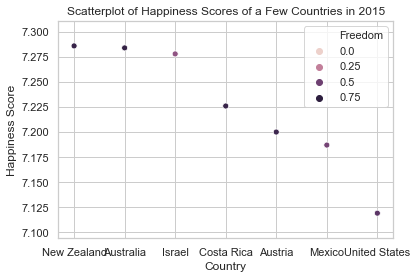

In [22]:
# Graph for 2015 Data
yr2015 = wrldHappiness.loc[wrldHappiness['Year'] == 2015]

plotCountries = wrldHappiness.iloc[8:15,0]
plot2015 = sns.scatterplot(x = plotCountries, y = 'Happiness Score', hue = 'Freedom', data = yr2015)
plot2015.set_title('Scatterplot of Happiness Scores of a Few Countries in 2015')
plot2015.set_xlabel('Country')


Text(0.5, 0, 'Country')

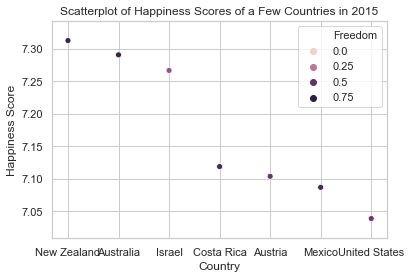

In [46]:
yr2016 = wrldHappiness.loc[wrldHappiness['Year'] == 2016]

plotCountries = wrldHappiness.iloc[8:15,0]
plot2016 = sns.scatterplot(x = plotCountries, y = 'Happiness Score', hue = 'Freedom', data = yr2016)
plot2016.set_title('Scatterplot of Happiness Scores of a Few Countries in 2015')
plot2016.set_xlabel('Country')


In [ ]:
yr2017 = wrldHappiness.loc[wrldHappiness['Year'] == 2017]

plotCountries = wrldHappiness.iloc[8:15,0]
plot2015 = sns.scatterplot(x = plotCountries, y = 'Happiness Score', hue = 'Freedom', data = yr2015)
plot2015.set_title('Scatterplot of Happiness Scores of a Few Countries in 2015')
plot2015.set_xlabel('Country')

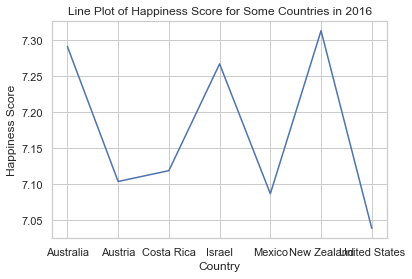

In [25]:
# Graph for 2016 Data

yr2016 = wrldHappiness.loc[wrldHappiness['Year'] == 2016]
plotCountries = wrldHappiness.iloc[8:15,0]

plot2016 = sns.lineplot(x = plotCountries, y = 'Happiness Score', data = yr2016)

plot2016.set_title('Line Plot of Happiness Score for Some Countries in 2016')
plot2016.set_xlabel('Country')
plot2016.set_ylabel('Happiness Score')

plt.show()

Text(0.5, 1.0, 'Happiness Scores for the Selected Countries in 2017')

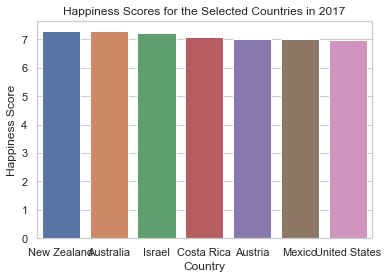

In [30]:
# Graph for 2017 Data

yr2017 = wrldHappiness.loc[wrldHappiness['Year'] == 2017]
plotCountries = wrldHappiness.iloc[8:15,0]

sns.set(style="whitegrid")

plot2017 = sns.barplot(x = plotCountries, y = 'Happiness Score', data = yr2017)

plt.title("Happiness Scores for the Selected Countries in 2017")

In [39]:
USAHappiness = wrldHappiness[wrldHappiness['Country']=='United States']

In [40]:
USAHappiness

,Country,Family,Freedom,GDP per Capita,Generosity,Happiness Rank,Happiness Score,Healthy life expectancy,Trust in Government,Year
14,United States,1.247110,0.546040,1.394510,0.401050,15,7.119,0.861790,0.158900,2015
12,United States,1.047820,0.481630,1.507960,0.410770,13,7.104,0.779000,0.148680,2016
13,United States,1.419921,0.505741,1.546259,0.392579,14,6.993,0.774287,0.135639,2017
17,United States,1.471000,0.547000,1.398000,0.291000,18,6.886,0.819000,0.133000,2018
18,United States,1.457000,0.454000,1.433000,0.280000,19,6.892,0.874000,0.128000,2019


Text(0.5, 1.0, 'Happiness over the years in USA')

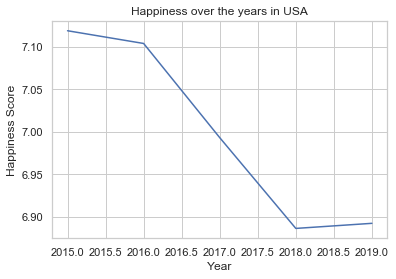

In [50]:
sns.set(style="whitegrid")
plotUSAHap = sns.lineplot(x = USAHappiness['Year'], y = 'Happiness Score', data = USAHappiness)
plt.title("Happiness over the years in USA")

Text(0.5, 1.0, 'Trust over the years in USA')

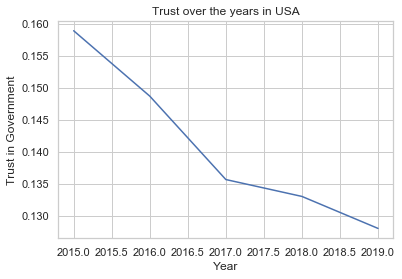

In [53]:
sns.set(style="whitegrid")
plotUSAHap = sns.lineplot(x = USAHappiness['Year'], y = 'Trust in Government', data = USAHappiness)
plt.title("Trust over the years in USA")

Text(0.5, 1.0, 'Generosity over the years in USA')

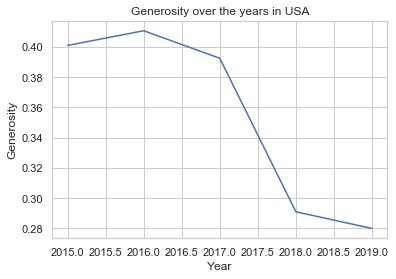

In [54]:
sns.set(style="whitegrid")
plotUSAHap = sns.lineplot(x = USAHappiness['Year'], y = 'Generosity', data = USAHappiness)
plt.title("Generosity over the years in USA")

Text(0.5, 1.0, 'GDP per Capita over the past five years')

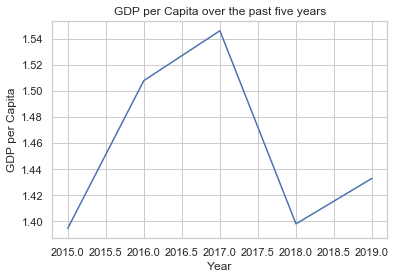

In [68]:
sns.set(style="whitegrid")
plotUSAHap = sns.lineplot(x = USAHappiness['Year'], y = USAHappiness['GDP per Capita'], data = USAHappiness)
plt.title("GDP per Capita over the past five years")

Text(0.5, 1.0, 'Amount of Family? in the USA')

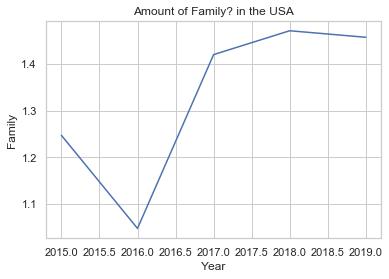

In [69]:
sns.set(style="whitegrid")
plotUSAHap = sns.lineplot(x = USAHappiness['Year'], y = USAHappiness['Family'], data = USAHappiness)
plt.title("Presence of family values in the USA")

Text(0, 0.5, 'Happiness Score')

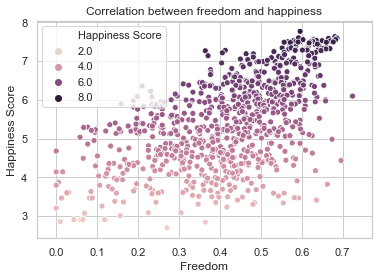

In [84]:
family = wrldHappiness['Family']
freedom = wrldHappiness['Freedom']
happiness = wrldHappiness['Happiness Score']
gdp = wrldHappiness['GDP per Capita']
generosity = wrldHappiness['Generosity']

plot = sns.scatterplot(x = freedom, y = happiness, hue = 'Happiness Score', data = wrldHappiness)
plot.set_title('Correlation between freedom and happiness')
plot.set_xlabel('Freedom')
plot.set_ylabel('Happiness Score')

Text(0, 0.5, 'Happiness Score')

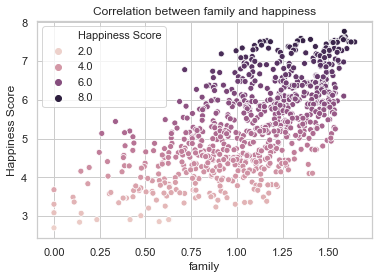

In [85]:
plot = sns.scatterplot(x = family, y = happiness, hue = 'Happiness Score', data = wrldHappiness)
plot.set_title('Correlation between family and happiness')
plot.set_xlabel('family')
plot.set_ylabel('Happiness Score')

Text(0, 0.5, 'Happiness Score')

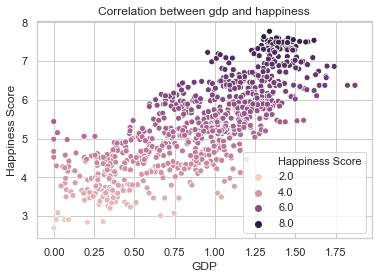

In [86]:
plot = sns.scatterplot(x = gdp, y = happiness, hue = 'Happiness Score', data = wrldHappiness)
plot.set_title('Correlation between gdp and happiness')
plot.set_xlabel('GDP')
plot.set_ylabel('Happiness Score')

Text(0, 0.5, 'Happiness Score')

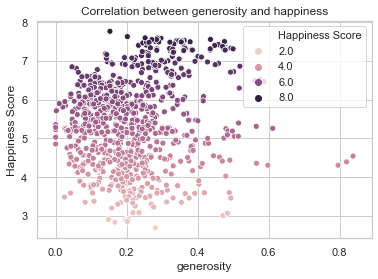

In [88]:
plot = sns.scatterplot(x = generosity, y = happiness, hue = 'Happiness Score', data = wrldHappiness)
plot.set_title('Correlation between generosity and happiness')
plot.set_xlabel('generosity')
plot.set_ylabel('Happiness Score')